<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/DeadOil_WellTest_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('/content/DeadOilWell.xlsx')

In [5]:
df = df.iloc[:,:2]

In [6]:
df.head()

,Pressure_Elapsed time,Pressure_Pressure
0,(hr),(psia) ...
1,0,2223.11
2,0.001,2203.7
3,0.003,2151.33
4,0.004,2067.73


In [7]:
len(df)

28234

In [8]:
df.columns = ['t','Pwf']

In [16]:
df = df.iloc[1:,:]

In [24]:
df = df[:-1]

In [25]:
df['Pwf'] = pd.to_numeric(df['Pwf'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df.head()

,t,Pwf
1,0.000,2223.11
2,0.001,2203.70
3,0.003,2151.33
4,0.004,2067.73
5,0.006,1954.69


In [30]:
Pi = 2223.11
df['delP'] = abs(Pi - df['Pwf'])

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,t,Pwf,delP
1,0.000,2223.11,0.00
2,0.001,2203.70,19.41
3,0.003,2151.33,71.78
4,0.004,2067.73,155.38
5,0.006,1954.69,268.42


In [34]:
df['d(delP)'] = np.zeros(len(df))

dp = abs(df['delP'].diff())

df['d(delP)'] = dp

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,t,Pwf,delP,d(delP)
1,0.000,2223.11,0.00,NaN
2,0.001,2203.70,19.41,19.41
3,0.003,2151.33,71.78,52.37
4,0.004,2067.73,155.38,83.60
5,0.006,1954.69,268.42,113.04


In [35]:
df['dt'] = np.zeros(len(df))

dt = abs(df['t'].diff())

df['dt'] = dt

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,t,Pwf,delP,d(delP),dt
1,0.000,2223.11,0.00,NaN,NaN
2,0.001,2203.70,19.41,19.41,0.001
3,0.003,2151.33,71.78,52.37,0.002
4,0.004,2067.73,155.38,83.60,0.001
5,0.006,1954.69,268.42,113.04,0.002


In [36]:
df['P-dash'] = df['t']*df['d(delP)']/df['dt']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df.head()

,t,Pwf,delP,d(delP),dt,P-dash
1,0.000,2223.11,0.00,NaN,NaN,NaN
2,0.001,2203.70,19.41,19.41,0.001,19.410
3,0.003,2151.33,71.78,52.37,0.002,78.555
4,0.004,2067.73,155.38,83.60,0.001,334.400
5,0.006,1954.69,268.42,113.04,0.002,339.120


In [40]:
df['dP'] = abs(df['Pwf'].diff())

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,t,Pwf,delP,d(delP),dt,P-dash,dP
1,0.000,2223.11,0.00,NaN,NaN,NaN,NaN
2,0.001,2203.70,19.41,19.41,0.001,19.410,19.41
3,0.003,2151.33,71.78,52.37,0.002,78.555,52.37
4,0.004,2067.73,155.38,83.60,0.001,334.400,83.60
5,0.006,1954.69,268.42,113.04,0.002,339.120,113.04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


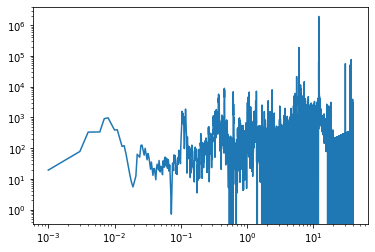

In [41]:
df["tdp/dt"] = df['t']*df['dP']/df['dt']

plt.loglog(df['t'],df['tdp/dt'])

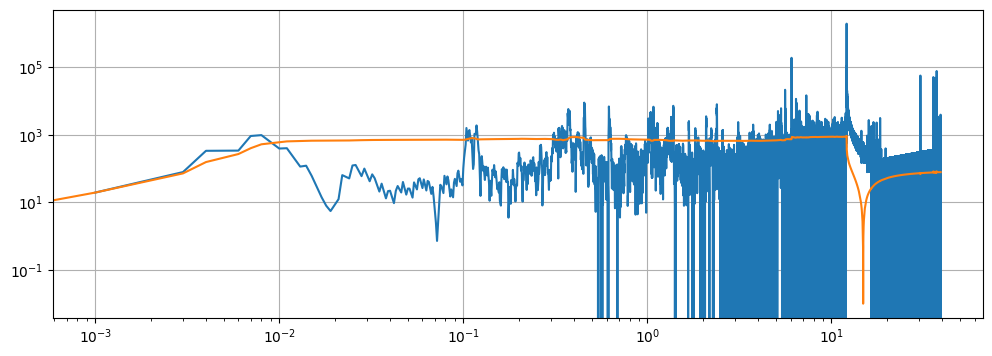

In [51]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.loglog(df['t'],df['P-dash'])
plt.loglog(df['t'],df['delP'])

plt.grid()

In [52]:
semilog = df[(df['t']>0.02) & (df['t']<0.9) ]

In [54]:
df2 = semilog

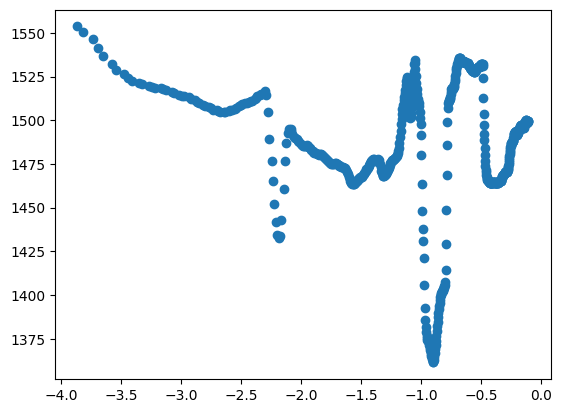

In [57]:
plt.scatter(np.log(df2['t']),df2['Pwf'])

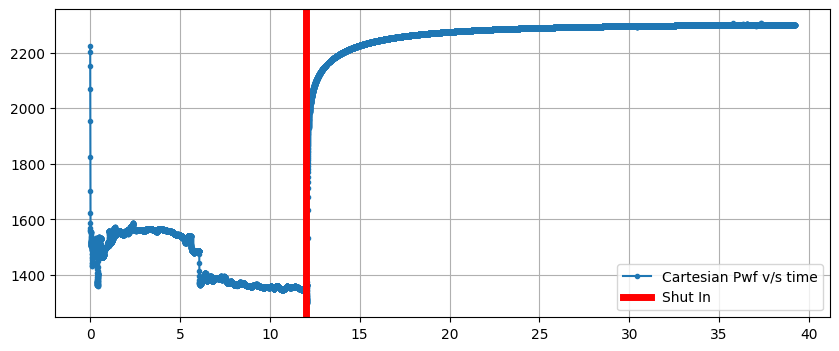

In [87]:
plt.figure(figsize=(10,4))

plt.plot(df['t'],df['Pwf'],marker='.',label='Cartesian Pwf v/s time')

plt.axvline(x=12,color='red',linewidth=5,label='Shut In')

plt.grid()
plt.legend()

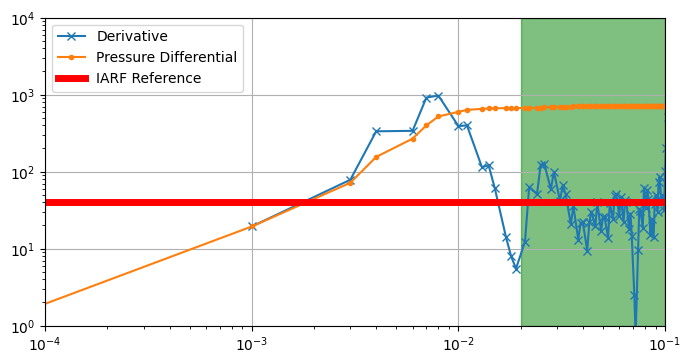

In [82]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.loglog(df3['t'],df3['P-dash'],marker='x',label='Derivative')
plt.loglog(df3['t'],df3['delP'],marker='.',label='Pressure Differential')
plt.axhline(y = 40,color='red',linewidth=5,label='IARF Reference')

plt.xlim(0.0001,0.1)
plt.ylim(1,10000)

plt.axvspan(0.02,0.1,color='green',alpha=0.5)

plt.legend(loc='upper left')
plt.grid()

In [88]:
#